In [1]:
import glob
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from sklearn.model_selection import train_test_split
import math
from statistics import mean
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
drive.mount('/content/drive')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Mounted at /content/drive


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#Tumor

In [3]:
df_tumor_1 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_1_coding.csv')
df_tumor_1

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,3.145254,-9.965784,6.301474,1.506500,2.677914,2.449403,3.445303,5.412324,2.358621,3.361853,...,-9.965784,-7.039785,-1.560217,-9.965784,-9.965784,-9.965784,-9.965784,-6.795859,-3.687800,1
786,2.903231,-9.965784,4.858289,1.243425,0.823586,2.041523,3.680358,4.943753,6.735640,3.864315,...,-9.965784,-6.844769,-4.594225,-9.965784,-9.965784,-9.965784,-9.965784,-5.665661,-1.280335,1
787,3.352674,-9.965784,4.714559,0.845751,0.248535,3.338895,4.015060,4.427633,0.664574,3.323817,...,-9.965784,-9.965784,0.236952,-9.965784,-9.965784,-9.965784,-9.965784,-5.921390,-2.751465,1
788,3.166426,-4.559792,5.055204,1.541862,1.183455,1.795808,1.982583,4.856777,4.251734,3.408236,...,-9.965784,-9.965784,-1.970300,-5.107803,-9.965784,-9.965784,-9.965784,-6.429731,-1.361416,1


In [4]:
df_tumor_2 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_2_coding.csv')
df_tumor_2

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.353126,-0.283141,4.345361,2.874482,1.831391,2.604024,3.878627,3.251977,4.392372,4.089091,...,-9.965784,-5.615287,-4.265345,-9.965784,-9.965784,-9.965784,-9.965784,-4.155855,-1.881507,1
1,4.111282,-1.049905,4.319343,2.489414,1.172167,2.391245,4.892877,3.775588,1.486611,4.137667,...,-9.965784,-4.779918,-2.834442,-2.973696,-9.965784,-9.965784,-9.965784,-4.290533,-1.604718,1
2,2.943715,-2.706512,4.457456,2.455728,1.304044,2.468557,4.002162,3.890923,1.172872,3.354339,...,-9.965784,-6.764150,-4.496549,-9.965784,-9.965784,-9.965784,-9.965784,-6.127841,-3.373327,1
3,3.184820,-3.236503,4.534354,1.584289,1.332221,2.747967,4.243677,2.878058,6.511321,3.134550,...,-9.965784,-3.851001,-4.039785,-9.965784,-9.965784,-7.243318,-9.965784,-5.526161,-1.654717,1
4,4.399151,-4.787866,4.936007,1.713256,1.590051,2.649202,2.293076,3.720880,7.084592,3.133580,...,-9.965784,-9.965784,-1.309359,-9.965784,-9.965784,-9.965784,-9.965784,-5.861448,-1.427013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
785,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
786,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
787,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [5]:
df_tumor = pd.concat([df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df_tumor

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1575,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1576,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1577,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [6]:
X = df_tumor.drop('tumor', axis=1)

In [7]:
threshold_edge = 0.8 #threshold to determine if two nodes are connected based on the correlation matrix

#Normal

In [ ]:
df_normal = pd.read_csv('/content/drive/MyDrive/lung/lung_normal_coding.csv')
df_normal

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
418,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
419,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
420,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [ ]:
X = df_normal.drop('tumor', axis=1)

In [ ]:
threshold_edge = 0.9 #threshold to determine if two nodes are connected based on the correlation matrix

#TRAINING EXPRESSED/NOT EXPRESSED GENES

In [8]:
X = X.transpose()

In [9]:
X

,0,1,2,3,4,5,6,7,8,9,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
ENSG00000000003.15,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,5.465037,...,3.236952,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155
ENSG00000000005.6,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,-3.945638,...,-2.362158,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784
ENSG00000000419.13,5.172844,5.505129,4.876036,4.125254,4.531756,5.085820,4.541434,4.415468,4.994652,5.753048,...,4.313253,4.802736,5.170674,4.460494,4.490936,5.458950,4.806401,3.840856,4.549663,4.916997
ENSG00000000457.14,1.602267,0.720629,0.443076,1.106549,2.968423,1.823505,1.943509,1.143785,1.603264,0.981633,...,2.710503,1.247502,1.433974,2.390998,2.278788,1.390503,2.202700,2.528996,0.432425,1.650581
ENSG00000000460.17,2.895497,1.305737,0.660746,-0.166341,2.185549,0.072037,0.863146,-0.531782,1.125783,1.988157,...,0.969307,0.612494,1.109494,2.036152,1.112433,0.803310,1.007985,0.847356,0.505078,1.350158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-5.710284,-6.828281,-9.965784,-7.137965,-9.965784,-9.965784,-7.002310,-9.965784
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
ENSG00000288674.1,-8.532825,-5.869860,-8.333516,-7.861448,-4.832385,-6.345198,-4.811979,-4.891108,-5.553003,-6.088040,...,-4.457990,-7.058894,-5.965784,-4.768076,-5.339345,-5.733124,-6.058894,-5.853084,-8.702750,-7.058894


Mean:  3.42792171697764


<Axes: >

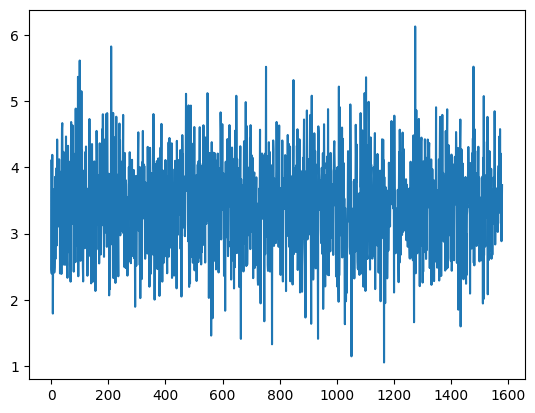

In [10]:
row = 2000
print("Mean: ", mean(X.iloc[row]))
X.iloc[row].plot()

In [11]:
#Evaluate gene expression
#For us a gene is expressed if the mean of the values between all the patients is over a threshold

threshold = math.log2(100) #threshold to determine if a gene is expressed or not
print("Threshold: ", threshold)

X['expressed'] = X.apply(lambda row: 1 if mean(row) > threshold else 0, axis=1)
X

Threshold:  6.643856189774724


,0,1,2,3,4,5,6,7,8,9,...,1570,1571,1572,1573,1574,1575,1576,1577,1578,expressed
ENSG00000000003.15,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,5.465037,...,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155,0
ENSG00000000005.6,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,-3.945638,...,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784,0
ENSG00000000419.13,5.172844,5.505129,4.876036,4.125254,4.531756,5.085820,4.541434,4.415468,4.994652,5.753048,...,4.802736,5.170674,4.460494,4.490936,5.458950,4.806401,3.840856,4.549663,4.916997,0
ENSG00000000457.14,1.602267,0.720629,0.443076,1.106549,2.968423,1.823505,1.943509,1.143785,1.603264,0.981633,...,1.247502,1.433974,2.390998,2.278788,1.390503,2.202700,2.528996,0.432425,1.650581,0
ENSG00000000460.17,2.895497,1.305737,0.660746,-0.166341,2.185549,0.072037,0.863146,-0.531782,1.125783,1.988157,...,0.612494,1.109494,2.036152,1.112433,0.803310,1.007985,0.847356,0.505078,1.350158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,0
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-5.710284,-6.828281,-9.965784,-7.137965,-9.965784,-9.965784,-7.002310,-9.965784,0
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,0
ENSG00000288674.1,-8.532825,-5.869860,-8.333516,-7.861448,-4.832385,-6.345198,-4.811979,-4.891108,-5.553003,-6.088040,...,-7.058894,-5.965784,-4.768076,-5.339345,-5.733124,-6.058894,-5.853084,-8.702750,-7.058894,0


In [ ]:
gene_tumor = X

In [ ]:
gene_normal = X

In [12]:
X['expressed'].value_counts()

0    19775
1      187
Name: expressed, dtype: int64

In [13]:
y = X['expressed']
X = X.drop('expressed', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

features_in = X_train.shape[1]
n_classes = len(y_train.unique())

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(features_in, 4098)
        self.conv2 = GCNConv(4098, 1024)
        self.conv3 = GCNConv(1024, 2)
        self.classifier = Linear(2, n_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out

model = GCN().double().to(device)
#model = GCN().double()
print(model)

GCN(
  (conv1): GCNConv(1579, 4098)
  (conv2): GCNConv(4098, 1024)
  (conv3): GCNConv(1024, 2)
  (classifier): Linear(in_features=2, out_features=2, bias=True)
)


In [16]:
correlation_matrix_train = np.corrcoef(X_train)
correlation_matrix_test = np.corrcoef(X_test)
print("CORR_MATRIX TRAIN shape: ", correlation_matrix_train.shape)
print("CORR_MATRIX TEST shape: ", correlation_matrix_test.shape)

CORR_MATRIX TRAIN shape:  (15969, 15969)
CORR_MATRIX TEST shape:  (3993, 3993)


In [17]:
X_train.shape

(15969, 1579)

In [18]:
#BUILD EDGE INDEX FOR TRAIN SET
mask = correlation_matrix_train > threshold_edge

# Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

# Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

# Create the edge_index tensor
edge_index_train = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index_train.shape)

torch.Size([2, 145900])


<ipython-input-18-3f28ae0b2f74>:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edge_index_train = torch.tensor([row_indices, col_indices], dtype=torch.int64)


In [19]:
#BUILD EDGE INDEX FOR TRAIN SET
mask = correlation_matrix_test > threshold_edge
# Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

# Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)
print(len(set(np.concatenate((row_indices, col_indices), axis=None))))
# Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index_test.shape)

422
torch.Size([2, 7804])


In [20]:
#CONVERT ALL TO TENSORS
x_train = torch.from_numpy(X_train.values)
y_train = torch.from_numpy(y_train.values)
x_test = torch.from_numpy(X_test.values)
y_test = torch.from_numpy(y_test.values)
correlation_matrix_train = torch.from_numpy(correlation_matrix_train)
correlation_matrix_test = torch.from_numpy(correlation_matrix_test)

In [26]:
#TRAIN SETTINGS
import torch.optim as optim
import torch.nn as nn

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 250

In [27]:
x_train = x_train.double().to(device)
edge_index_train = edge_index_train.to(device)
y_train = y_train.to(device)

In [28]:
import numpy as np

#TRAIN LOOP
for epoch in range(n_epochs):
    optimizer.zero_grad()
    out = model(x_train, edge_index_train)
    loss = loss_fn(out, y_train)
    # backward pass
    loss.backward()
    if epoch % 10 == 0:
      print(f"EPOCH {epoch}, LOSS: {loss}")
    # update weights
    optimizer.step()

EPOCH 0, LOSS: 1.0922824514749303
EPOCH 10, LOSS: 0.969825149784826


KeyboardInterrupt: 

In [ ]:
x_test = x_test.to(device)
edge_index_test = edge_index_test.to(device)
y_test = y_test.to(device)

In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy sul test set: {}".format(test_acc))

#COMPARISON BETWEEN GENES

In [ ]:
gene_tumor

,0,1,2,3,4,5,6,7,8,9,...,1570,1571,1572,1573,1574,1575,1576,1577,1578,expressed
ENSG00000005022.6,8.415786,8.180495,9.271039,7.591575,6.717553,8.086438,8.260414,8.010731,7.489866,7.923086,...,6.530667,6.970003,7.581704,6.633289,7.573612,7.152034,7.837487,7.926827,7.911908,1
ENSG00000019582.15,8.875820,10.194735,5.499297,9.392719,8.847617,9.454787,9.715103,11.619740,9.153834,9.156655,...,7.568703,8.776127,8.299683,8.228270,10.329023,7.167433,10.865678,8.947896,5.393076,1
ENSG00000030582.18,7.304221,8.492410,5.986784,7.416998,6.338360,7.378716,6.099670,9.083824,7.951043,6.989712,...,7.164625,7.007884,6.032808,6.149822,7.787334,6.261441,7.756106,8.819727,7.073954,1
ENSG00000034510.6,10.653497,11.261172,11.193402,11.799531,10.294094,12.852643,11.912156,11.090546,11.050453,11.223550,...,12.598803,11.933045,9.841366,11.477998,11.799107,10.194365,11.682706,12.246316,10.915804,1
ENSG00000044574.8,7.879042,7.980823,8.487842,8.549771,7.000734,7.803057,7.112772,8.320057,8.943084,7.742239,...,7.644982,8.331428,6.002948,6.869866,6.867467,6.137210,8.371968,7.670922,7.871453,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000229117.9,6.935299,7.834671,8.843616,7.522580,6.748616,8.469676,9.753157,7.488584,6.937873,7.586873,...,7.988173,7.484953,7.891860,7.810209,7.422399,7.226069,8.083314,8.667294,8.063703,1
ENSG00000231500.7,9.067834,9.581444,10.813569,9.640548,8.176505,10.859491,10.511862,9.251695,8.856514,9.639317,...,9.204187,8.586442,9.589220,9.515806,8.956427,7.881810,10.034087,10.244316,9.639957,1
ENSG00000233276.7,7.192426,8.119950,7.284249,7.512247,6.503705,7.973839,7.724281,8.552651,7.335787,7.551714,...,8.661233,7.833934,6.145500,7.202199,7.658416,7.019464,7.968905,8.295096,6.593218,1
ENSG00000234745.12,8.569497,9.971119,9.393952,9.320340,9.385000,8.779954,8.791074,9.994429,10.329034,9.001800,...,8.262209,10.049863,8.178004,8.925386,9.898550,7.864958,10.559237,9.781407,5.954278,1


In [ ]:
gene_normal

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,expressed
ENSG00000000003.15,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,2.993221,...,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704,0
ENSG00000000005.6,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,-0.926865,...,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293,0
ENSG00000000419.13,4.542147,4.511342,4.282173,4.582514,4.474137,4.006917,4.312868,4.665722,4.256611,4.495785,...,4.728405,4.475623,4.080112,4.359367,4.487744,4.775999,4.482906,4.277464,4.384478,0
ENSG00000000457.14,1.132050,1.998593,1.180339,1.694212,1.192005,2.005580,2.174566,1.888811,0.815411,1.862154,...,1.635987,1.515460,2.322822,0.219215,2.227464,2.173863,1.199625,1.931986,2.185708,0
ENSG00000000460.17,-1.118414,0.231924,-0.991370,0.110898,-0.742024,0.311387,0.667120,0.526970,-0.979942,0.366924,...,-0.072938,0.115300,0.795434,-1.186722,0.619929,0.614286,-0.432844,0.525868,0.534261,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,0
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-6.748554,-6.930160,-6.878321,-9.965784,-6.861448,-9.965784,-9.965784,-9.965784,-9.965784,0
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,0
ENSG00000288674.1,-6.049308,-4.608232,-9.965784,-5.844769,-6.493297,-4.853084,-3.880445,-4.680382,-4.710284,-4.095420,...,-4.684086,-4.351074,-4.221623,-6.254289,-4.030325,-3.791857,-5.293359,-4.643856,-5.748554,0


In [ ]:
gene_tumor = gene_tumor[gene_tumor['expressed'] == 1]
gene_normal = gene_normal[gene_normal['expressed'] == 0]

In [ ]:
gene_biomarkers = pd.merge(gene_tumor, gene_normal, left_index=True, right_index=True, how='inner')
gene_biomarkers

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,413_y,414_y,415_y,416_y,417_y,418_y,419_y,420_y,421_y,expressed_y
ENSG00000005022.6,8.415786,8.180495,9.271039,7.591575,6.717553,8.086438,8.260414,8.010731,7.489866,7.923086,...,6.040954,6.124740,5.928666,7.667609,6.210724,6.052407,6.965872,6.015078,5.804529,0
ENSG00000044574.8,7.879042,7.980823,8.487842,8.549771,7.000734,7.803057,7.112772,8.320057,8.943084,7.742239,...,6.376867,5.956861,5.449301,7.207307,6.355998,5.778274,7.360985,5.793560,5.420156,0
ENSG00000063177.13,6.644251,7.728704,8.275693,7.317267,5.559152,7.965755,8.116880,7.382979,6.388951,7.445602,...,5.897407,6.255149,6.101032,6.932189,6.132764,6.204749,6.776490,6.002241,5.928690,0
ENSG00000065978.19,7.540017,7.641472,7.834685,6.564302,5.778818,7.111973,6.819586,6.962771,6.520994,8.232853,...,6.370992,6.486182,6.396913,7.392350,6.597880,6.313150,6.845075,6.058206,6.305657,0
ENSG00000067225.18,7.242302,8.278816,8.581640,6.508928,5.875647,7.108145,8.474687,7.115144,7.313714,7.973899,...,5.772527,5.808578,5.694426,7.316621,5.719474,5.128533,6.778449,5.353348,5.416387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000196230.13,9.336152,8.227404,8.083570,7.398390,6.972299,6.856620,7.136219,6.983222,8.257265,8.835557,...,5.929748,6.004205,6.247555,7.306441,6.334997,5.815007,7.260425,5.628552,6.010326,0
ENSG00000196419.13,7.324089,6.590491,7.800247,6.913527,5.958659,7.296800,7.092193,6.855460,6.626674,6.756233,...,6.019951,6.094802,5.951453,6.642143,6.181005,6.261700,6.402809,6.035813,5.948599,0
ENSG00000198695.2,9.571197,7.699314,8.127854,9.714426,4.801821,8.222252,4.765922,12.391056,8.244349,11.003966,...,4.407387,5.042824,5.316414,11.030090,5.584451,4.955285,12.355156,4.631878,5.872858,0
ENSG00000228253.1,9.317324,7.513082,9.281127,9.656158,4.688449,6.356500,4.350830,10.557565,9.059367,8.672683,...,4.919979,4.703599,4.831092,8.436658,5.762867,4.775677,10.810650,3.875662,5.465818,0


In [ ]:
X.index.get_loc('ENSG00000146648.19')

8752

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18', 'ENSG00000196230.13']
for g in genes:
  print(g)
  print(X.loc[g].mean())
  print(gene_normal.loc[g].mean())

ENSG00000146648.19
4.011519234696797
3.8408659222023136
ENSG00000133703.13
3.3944361647568844
2.884871586584953
ENSG00000105976.16
4.607119910621015
4.494519943939525
ENSG00000157764.14
1.2430113490054306
2.1524606588212882
ENSG00000121879.6
1.6251146680256994
2.010170686117072
ENSG00000171094.18
-3.0329898278179055
-1.4330723018843585
ENSG00000165731.20
-1.5235941404598452
-2.1657436583490646
ENSG00000047936.11
2.091032593530503
5.2707206861053795
ENSG00000141510.18
3.1960954989655455
2.257829180068991
ENSG00000196230.13
7.3333056329804505
6.197759635126054


#LOUVAIN

In [ ]:
!pip install python-louvain

In [ ]:
edge_numpy = edge_index_train.numpy()
edges = list(zip(edge_numpy[0], edge_numpy[1]))

In [ ]:
import networkx as nx
import community.community_louvain as community_louvain # python-louvain library

# Create a sample graph with edge indexes
#edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6)]
G = nx.Graph(edges)

# Compute the communities using the Louvain algorithm
partition = community_louvain.best_partition(G)
print(len(set(partition.values())))
#partition = community_louvain.best_partition(partition)

# Print the communities
print("Node: Community")

for node, community_id in partition.items():
    print(f"{node}: {community_id}")

159
Node: Community
1: 0
6: 0
84: 0
675: 0
917: 0
1442: 0
1937: 0
2000: 0
2317: 0
3354: 0
3576: 0
3980: 0
4554: 0
4606: 0
4675: 0
4715: 0
4860: 0
5040: 0
5559: 0
5761: 0
5873: 0
5875: 0
6373: 0
6970: 0
6981: 0
8143: 0
8709: 0
8838: 0
9122: 0
9215: 0
9231: 0
9400: 0
9543: 0
10504: 0
10577: 0
11954: 0
12192: 0
12290: 0
12814: 0
12973: 0
13139: 0
14482: 0
15396: 0
530: 0
851: 0
1019: 0
4586: 0
5038: 0
6083: 0
6315: 0
7616: 0
9185: 0
9346: 0
9624: 0
10014: 0
11138: 0
11360: 0
13771: 0
14011: 0
15142: 0
15413: 0
15778: 0
8: 1
409: 1
15820: 1
14: 1
1069: 1
1714: 1
1902: 1
2590: 1
3106: 1
6502: 1
6752: 1
6756: 1
7048: 1
7058: 1
7782: 1
8465: 1
8494: 1
9344: 1
9476: 1
11591: 1
11718: 1
12065: 1
12213: 1
12241: 1
13417: 1
13792: 1
13800: 1
13963: 1
14413: 1
14427: 1
14457: 1
15019: 1
15056: 1
15220: 1
15245: 1
15416: 1
16: 2
72: 2
149: 2
193: 2
215: 2
283: 2
286: 2
336: 2
350: 2
399: 2
541: 2
559: 2
590: 2
609: 2
696: 2
701: 2
715: 2
739: 2
765: 2
803: 2
998: 2
1065: 2
1144: 2
1187: 2
1195: 2
1

#LEIDEN

In [ ]:
!pip install leidenalg
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: igraph
    Found existing installation: igraph 0.10.8
    Uninstalling igraph-0.10.8:
      Successfully uninstalled igraph-0.10.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
leidenalg 0.10.1 requires igraph<0.11,>=0.10.0, but you have igraph 0.11.3 which is incompatible.


In [ ]:
edge_numpy = edge_index_train.numpy()
edges = list(zip(edge_numpy[0], edge_numpy[1]))

In [ ]:
import leidenalg as la
import networkx as nx
from igraph import Graph as IGraph

# Create a sample graph with edge indexes
#edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6)]
G = nx.Graph(edges)

ig_graph = IGraph.TupleList(edges, directed=False)
partition = la.find_partition(ig_graph, la.ModularityVertexPartition)
print(len(set(partition.membership)))

# Print the communities
print("Node: Community")
for node, community_id in enumerate(partition.membership):
    print(f"{node}: {community_id}")

159
Node: Community
0: 2
1: 2
2: 2
3: 2
4: 2
5: 2
6: 2
7: 2
8: 2
9: 2
10: 2
11: 2
12: 2
13: 2
14: 2
15: 2
16: 2
17: 2
18: 2
19: 2
20: 2
21: 2
22: 2
23: 2
24: 2
25: 2
26: 2
27: 2
28: 2
29: 2
30: 2
31: 2
32: 2
33: 2
34: 2
35: 2
36: 2
37: 2
38: 2
39: 2
40: 2
41: 2
42: 2
43: 2
44: 2
45: 2
46: 2
47: 2
48: 2
49: 2
50: 2
51: 2
52: 2
53: 2
54: 2
55: 2
56: 2
57: 2
58: 2
59: 2
60: 2
61: 2
62: 0
63: 0
64: 0
65: 0
66: 0
67: 0
68: 0
69: 0
70: 0
71: 0
72: 0
73: 0
74: 0
75: 0
76: 0
77: 0
78: 0
79: 0
80: 0
81: 0
82: 0
83: 0
84: 0
85: 0
86: 0
87: 0
88: 0
89: 0
90: 0
91: 0
92: 0
93: 0
94: 0
95: 0
96: 0
97: 0
98: 3
99: 3
100: 3
101: 3
102: 3
103: 3
104: 3
105: 3
106: 3
107: 3
108: 3
109: 3
110: 3
111: 3
112: 3
113: 3
114: 3
115: 3
116: 3
117: 3
118: 3
119: 3
120: 3
121: 3
122: 3
123: 3
124: 3
125: 3
126: 3
127: 3
128: 3
129: 3
130: 3
131: 3
132: 3
133: 3
134: 3
135: 3
136: 3
137: 3
138: 3
139: 3
140: 3
141: 3
142: 3
143: 3
144: 3
145: 3
146: 3
147: 3
148: 3
149: 3
150: 3
151: 3
152: 3
153: 3
154: 3
155: 